In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [3]:
print(fraud_data.shape)
print(fraud_data.isnull().sum())
print(fraud_data.dtypes)

(600, 6)
Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64
Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object


In [4]:
#will convert the cols having object type to binary format
le = LabelEncoder()
for column_name in fraud_data.columns:
    if fraud_data[column_name].dtype == object:
        fraud_data[column_name]  = le.fit_transform(fraud_data[column_name])
    else:
        pass

In [5]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [6]:
fraud_data["income"]="test"
fraud_data.loc[fraud_data["Taxable.Income"]>30000,"income"]="Good"
fraud_data.loc[fraud_data["Taxable.Income"]<=30000,"income"]="Risky"
fraud_data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
5,0,0,33329,116382,0,0,Good
6,0,0,83357,80890,8,1,Good
7,1,2,62774,131253,3,1,Good
8,0,2,83519,102481,12,1,Good
9,1,0,98152,155482,4,1,Good


In [7]:
fraud_data.income.value_counts()

Good     476
Risky    124
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

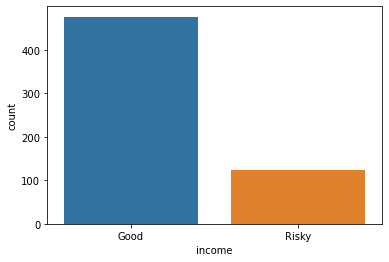

In [8]:
sns.countplot(fraud_data['income'])

In [9]:
fraud_data.drop(["Taxable.Income"],axis=1,inplace=True)
fraud_data.head(10)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
5,0,0,116382,0,0,Good
6,0,0,80890,8,1,Good
7,1,2,131253,3,1,Good
8,0,2,102481,12,1,Good
9,1,0,155482,4,1,Good


In [10]:
fraud_data['income'] = le.fit_transform(fraud_data['income'])
fraud_data.head(10)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
5,0,0,116382,0,0,0
6,0,0,80890,8,1,0
7,1,2,131253,3,1,0
8,0,2,102481,12,1,0
9,1,0,155482,4,1,0


In [11]:
print(fraud_data.dtypes)
fraud_data.describe(include='all')

Undergrad          int32
Marital.Status     int32
City.Population    int64
Work.Experience    int64
Urban              int32
income             int32
dtype: object


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,199778.000000,30.000000,1.000000,1.000000


<AxesSubplot:xlabel='income', ylabel='count'>

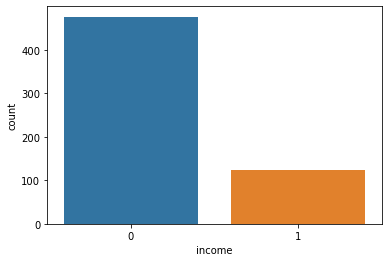

In [12]:
sns.countplot(fraud_data['income'])

In [13]:
x = fraud_data.iloc[:,:-1]
y = fraud_data[['income']]
print(x)
y

     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]


,income
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [14]:
# without Scaled i/p
#Model building, training, testing, evaluation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10, stratify = y)
print(x_train.shape)
print(x_test.shape)

#rf_model = RandomForestClassifier()
rf_model = RandomForestClassifier(class_weight={0:1, 1:4})
rf_model.fit(x_train, y_train)

y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

print("Accuracy Train Data =",accuracy_score(y_train,y_pred_train))
print("Accuracy Test Data =",accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print("F1 score = ",f1_score(y_test,y_pred_test))

(480, 5)
(120, 5)
Accuracy Train Data = 1.0
Accuracy Test Data = 0.7666666666666667
[[91  4]
 [24  1]]
F1 score =  0.06666666666666667


In [15]:
# with scaled i/p
scaled = StandardScaler()
x_transformed = scaled.fit_transform(x)

x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_transformed, y, test_size = 0.20, random_state = 10)
x_train_scaled

#Model building, training, testing, evaluation
rf_model = RandomForestClassifier(class_weight={0:1, 1:4})
#rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)

y_pred_train_scaled = rf_model.predict(x_train_scaled)
y_pred_test_scaled = rf_model.predict(x_test_scaled)

print("Accuracy scaled Train Data =",accuracy_score(y_train,y_pred_train_scaled))
print("Accuracy Scaled Test Data =",accuracy_score(y_test,y_pred_test_scaled))
print(confusion_matrix(y_test,y_pred_test_scaled))
print(classification_report(y_test,y_pred_test_scaled))
print("F1 score = ",f1_score(y_test,y_pred_test_scaled))

Accuracy scaled Train Data = 1.0
Accuracy Scaled Test Data = 0.7333333333333333
[[88  6]
 [26  0]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        94
           1       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120

F1 score =  0.0


In [16]:
# Model optimization GridSearchCV
rf_model = RandomForestClassifier()
rf_model_tweaked = GridSearchCV(estimator= rf_model, param_grid = { 'max_features':["auto", "sqrt", "log2"], 
                                                    'max_depth' :[2,3,4,5,6,7,8,9],
                                                    'min_samples_split' : [2,3,4,5],
                                                     'class_weight':[{0:1, 1:4}]                                                                   
                                               })
rf_model_tweaked.fit(x_train,y_train)
print(rf_model_tweaked.best_params_)
print(rf_model_tweaked.best_score_)

{'class_weight': {0: 1, 1: 4}, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 2}
0.7625000000000001


In [17]:
# GridSearchCV params - Scaled input
#Model building, training, testing, evaluation
rf_model = RandomForestClassifier(max_depth = 9, max_features= 'sqrt', min_samples_split = 2, class_weight={0:1, 1:4})
rf_model.fit(x_train_scaled, y_train)

y_pred_train_scaled = rf_model.predict(x_train_scaled)
y_pred_test_scaled = rf_model.predict(x_test_scaled)

print("Accuracy scaled Train Data =",accuracy_score(y_train,y_pred_train_scaled))
print("Accuracy Scaled Test Data =",accuracy_score(y_test,y_pred_test_scaled))
print(confusion_matrix(y_test,y_pred_test_scaled))
print(classification_report(y_test,y_pred_test_scaled))
print("F1 score = ",f1_score(y_test,y_pred_test_scaled)

SyntaxError: unexpected EOF while parsing (<ipython-input-17-9821b97fdc52>, line 13)

In [ ]:
# GridSearchCV params - without Scaled i/p
#Model building, training, testing, evaluation
rf_model = RandomForestClassifier(max_depth = 9, max_features= 'sqrt', min_samples_split = 2, class_weight={0:1, 1:4})
rf_model.fit(x_train, y_train)

y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

print("Accuracy scaled Train Data =",accuracy_score(y_train,y_pred_train))
print("Accuracy Scaled Test Data =",accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print("F1 score = ",f1_score(y_test,y_pred_test))